In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request

%matplotlib inline
import plotnine as p9

In [59]:
data = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv").head(2500)
data.head()

/var/folders/0x/j2sfsgp167vf2w83dyjt6_nm0000gn/T/ipykernel_2575/4252877247.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.


,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
0,052052,2020/05/29,CA,052052,KINDRED HOSPITAL RIVERSIDE,2224 MEDICAL CENTER DRIVE,PERRIS,92571.0,Long Term,6065.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
1,070038,2020/04/24,CT,070038,"CONNECTICUT HOSPICE INC,THE",100 DOUBLE BEACH ROAD,BRANFORD,6405.0,Short Term,9009.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
2,100034,2020/05/01,FL,100034,"MOUNT SINAI MEDICAL CENTER OF FLORIDA, INC",4300 ALTON RD,MIAMI BEACH,33140.0,Short Term,12086.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
3,100069,2020/05/15,FL,100069,ADVENTHEALTH CARROLLWOOD,7171 N DALE MABRY HWY,TAMPA,33614.0,Short Term,12057.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
4,100070,2020/04/24,FL,100070,SHOREPOINT HEALTH VENICE,540 THE RIALTO,VENICE,34285.0,Short Term,12115.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Columns: 128 entries, hospital_pk to total_staffed_pediatric_icu_beds_7_day_sum
dtypes: bool(2), float64(87), int64(29), object(10)
memory usage: 2.4+ MB


In [61]:
data.describe()

,zip,fips_code,total_beds_7_day_avg,all_adult_hospital_beds_7_day_avg,all_adult_hospital_inpatient_beds_7_day_avg,inpatient_beds_used_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_avg,inpatient_beds_used_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
count,2500.000000,2494.000000,1840.000000,79.000000,77.000000,1847.000000,109.000000,2340.000000,269.000000,290.000000,...,7.0,75.000000,2500.000000,75.000000,50.000000,2500.000000,50.000000,34.000000,2500.000000,34.000000
mean,54714.379200,29082.826383,-379.482772,84.767089,-12921.381818,-115242.808609,-146751.644037,-324348.907650,-256499.860967,-220685.677586,...,0.0,-13333.320000,0.130000,-13333.320000,-59999.940000,0.104800,-39999.780000,2.352941,0.075200,16.470588
std,26823.350307,16406.647545,23317.929057,132.496239,113968.106468,319525.131105,355545.227027,468241.186837,437520.856705,415430.086241,...,0.0,115469.938368,0.854513,115469.938368,239897.697584,0.802293,197948.502893,13.031157,0.684786,91.218099
min,603.000000,1001.000000,-999999.000000,0.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,...,0.0,-999999.000000,0.000000,-999999.000000,-999999.000000,0.000000,-999999.000000,0.000000,0.000000,0.000000
25%,33425.500000,16013.000000,27.000000,24.000000,14.000000,6.950000,4.000000,-999999.000000,-999999.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56272.500000,28159.000000,77.600000,38.000000,25.000000,28.000000,9.700000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76143.250000,42091.000000,206.250000,77.000000,58.700000,99.300000,29.900000,8.900000,4.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99901.000000,72127.000000,6542.000000,678.000000,751.900000,1810.300000,593.400000,670.400000,154.000000,130.500000,...,0.0,0.000000,7.000000,0.000000,0.000000,7.000000,9.000000,76.000000,7.000000,532.000000


In [62]:

len(data)

2500

In [63]:
# with pd.option_context('display.max_columns', None):
#   display(data)
data.columns.tolist()

['hospital_pk',
 'collection_week',
 'state',
 'ccn',
 'hospital_name',
 'address',
 'city',
 'zip',
 'hospital_subtype',
 'fips_code',
 'is_metro_micro',
 'total_beds_7_day_avg',
 'all_adult_hospital_beds_7_day_avg',
 'all_adult_hospital_inpatient_beds_7_day_avg',
 'inpatient_beds_used_7_day_avg',
 'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
 'inpatient_beds_used_covid_7_day_avg',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
 'inpatient_beds_7_day_avg',
 'total_icu_beds_7_day_avg',
 'total_staffed_adult_icu_beds_7_day_avg',
 'icu_beds_used_7_day_avg',
 'staffed_adult_icu_bed_occupancy_7_day_avg',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
 'staffed_icu_adult_patients_confirmed_covid_7_day_avg',
 'total_p

In [64]:
data.count()

hospital_pk                                           2500
collection_week                                       2500
state                                                 2500
ccn                                                   2492
hospital_name                                         2500
                                                      ... 
staffed_pediatric_icu_bed_occupancy_7_day_coverage    2500
staffed_pediatric_icu_bed_occupancy_7_day_sum           50
total_staffed_pediatric_icu_beds_7_day_avg              34
total_staffed_pediatric_icu_beds_7_day_coverage       2500
total_staffed_pediatric_icu_beds_7_day_sum              34
Length: 128, dtype: int64

In [65]:
clean = data
clean = clean.drop(['total_beds_7_day_avg',
 'all_adult_hospital_beds_7_day_avg',
 'all_adult_hospital_inpatient_beds_7_day_avg',
 'inpatient_beds_used_7_day_avg',
 'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
 'inpatient_beds_used_covid_7_day_avg', 
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
 'inpatient_beds_7_day_avg',
 'total_icu_beds_7_day_avg',
 'total_staffed_adult_icu_beds_7_day_avg',
 'icu_beds_used_7_day_avg',
 'staffed_adult_icu_bed_occupancy_7_day_avg',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
 'staffed_icu_adult_patients_confirmed_covid_7_day_avg',
 'total_patients_hospitalized_confirmed_influenza_7_day_avg',
 'icu_patients_confirmed_influenza_7_day_avg',
 'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg',
 'all_pediatric_inpatient_bed_occupied_7_day_avg',
 'all_pediatric_inpatient_beds_7_day_avg',
 'staffed_icu_pediatric_patients_confirmed_covid_7_day_avg',
 'staffed_pediatric_icu_bed_occupancy_7_day_avg',
 'total_staffed_pediatric_icu_beds_7_day_avg',
 'total_beds_7_day_coverage',
 'all_adult_hospital_beds_7_day_coverage',
 'all_adult_hospital_inpatient_beds_7_day_coverage',
 'inpatient_beds_used_7_day_coverage',
 'all_adult_hospital_inpatient_bed_occupied_7_day_coverage',
 'inpatient_beds_used_covid_7_day_coverage',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_coverage',
 'total_adult_patients_hospitalized_confirmed_covid_7_day_coverage',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_coverage',
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_coverage',
 'inpatient_beds_7_day_coverage',
 'total_icu_beds_7_day_coverage',
 'total_staffed_adult_icu_beds_7_day_coverage',
 'icu_beds_used_7_day_coverage',
 'staffed_adult_icu_bed_occupancy_7_day_coverage',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_coverage',
 'staffed_icu_adult_patients_confirmed_covid_7_day_coverage',
 'total_patients_hospitalized_confirmed_influenza_7_day_coverage',
 'icu_patients_confirmed_influenza_7_day_coverage',
 'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_coverage',
 'previous_day_admission_adult_covid_confirmed_7_day_coverage',
 'previous_day_admission_pediatric_covid_confirmed_7_day_coverage',
 'previous_day_admission_adult_covid_suspected_7_day_coverage',
 'previous_day_admission_pediatric_covid_suspected_7_day_coverage',
 'all_pediatric_inpatient_bed_occupied_7_day_coverage',
 'all_pediatric_inpatient_beds_7_day_coverage',
 'staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage',
 'staffed_pediatric_icu_bed_occupancy_7_day_coverage',
 'total_staffed_pediatric_icu_beds_7_day_coverage',
  ], axis=1)
# clean.to_csv('clean_df')
clean.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,is_corrected,all_pediatric_inpatient_bed_occupied_7_day_sum,all_pediatric_inpatient_beds_7_day_sum,previous_day_admission_pediatric_covid_confirmed_0_4_7_day_sum,previous_day_admission_pediatric_covid_confirmed_12_17_7_day_sum,previous_day_admission_pediatric_covid_confirmed_5_11_7_day_sum,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_sum
0,052052,2020/05/29,CA,052052,KINDRED HOSPITAL RIVERSIDE,2224 MEDICAL CENTER DRIVE,PERRIS,92571.0,Long Term,6065.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,070038,2020/04/24,CT,070038,"CONNECTICUT HOSPICE INC,THE",100 DOUBLE BEACH ROAD,BRANFORD,6405.0,Short Term,9009.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100034,2020/05/01,FL,100034,"MOUNT SINAI MEDICAL CENTER OF FLORIDA, INC",4300 ALTON RD,MIAMI BEACH,33140.0,Short Term,12086.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100069,2020/05/15,FL,100069,ADVENTHEALTH CARROLLWOOD,7171 N DALE MABRY HWY,TAMPA,33614.0,Short Term,12057.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100070,2020/04/24,FL,100070,SHOREPOINT HEALTH VENICE,540 THE RIALTO,VENICE,34285.0,Short Term,12115.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
clean.columns.tolist()

['hospital_pk',
 'collection_week',
 'state',
 'ccn',
 'hospital_name',
 'address',
 'city',
 'zip',
 'hospital_subtype',
 'fips_code',
 'is_metro_micro',
 'total_beds_7_day_sum',
 'all_adult_hospital_beds_7_day_sum',
 'all_adult_hospital_inpatient_beds_7_day_sum',
 'inpatient_beds_used_7_day_sum',
 'all_adult_hospital_inpatient_bed_occupied_7_day_sum',
 'inpatient_beds_used_covid_7_day_sum',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
 'total_adult_patients_hospitalized_confirmed_covid_7_day_sum',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum',
 'inpatient_beds_7_day_sum',
 'total_icu_beds_7_day_sum',
 'total_staffed_adult_icu_beds_7_day_sum',
 'icu_beds_used_7_day_sum',
 'staffed_adult_icu_bed_occupancy_7_day_sum',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum',
 'staffed_icu_adult_patients_confirmed_covid_7_day_sum',
 'total_p

In [67]:
clean.head()


,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,is_corrected,all_pediatric_inpatient_bed_occupied_7_day_sum,all_pediatric_inpatient_beds_7_day_sum,previous_day_admission_pediatric_covid_confirmed_0_4_7_day_sum,previous_day_admission_pediatric_covid_confirmed_12_17_7_day_sum,previous_day_admission_pediatric_covid_confirmed_5_11_7_day_sum,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_sum
0,052052,2020/05/29,CA,052052,KINDRED HOSPITAL RIVERSIDE,2224 MEDICAL CENTER DRIVE,PERRIS,92571.0,Long Term,6065.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,070038,2020/04/24,CT,070038,"CONNECTICUT HOSPICE INC,THE",100 DOUBLE BEACH ROAD,BRANFORD,6405.0,Short Term,9009.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100034,2020/05/01,FL,100034,"MOUNT SINAI MEDICAL CENTER OF FLORIDA, INC",4300 ALTON RD,MIAMI BEACH,33140.0,Short Term,12086.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100069,2020/05/15,FL,100069,ADVENTHEALTH CARROLLWOOD,7171 N DALE MABRY HWY,TAMPA,33614.0,Short Term,12057.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100070,2020/04/24,FL,100070,SHOREPOINT HEALTH VENICE,540 THE RIALTO,VENICE,34285.0,Short Term,12115.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# test = clean[['total_adult_patients_hospitalized_confirmed_covid_7_day_sum', 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum']]
# clean['total_patients_hospitalized_confirmed_covid_7_day_sum'] = clean['total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum'] + clean['total_adult_patients_hospitalized_confirmed_covid_7_day_sum']
# clean = clean.drop(['total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum', 
#                     'total_adult_patients_hospitalized_confirmed_covid_7_day_sum'], axis=1)
# clean.head()

78

In [56]:
clean.columns.tolist()

['hospital_pk',
 'collection_week',
 'state',
 'ccn',
 'hospital_name',
 'address',
 'city',
 'zip',
 'hospital_subtype',
 'fips_code',
 'is_metro_micro',
 'total_beds_7_day_sum',
 'all_adult_hospital_beds_7_day_sum',
 'all_adult_hospital_inpatient_beds_7_day_sum',
 'inpatient_beds_used_7_day_sum',
 'all_adult_hospital_inpatient_bed_occupied_7_day_sum',
 'inpatient_beds_used_covid_7_day_sum',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
 'total_adult_patients_hospitalized_confirmed_covid_7_day_sum',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum',
 'inpatient_beds_7_day_sum',
 'total_icu_beds_7_day_sum',
 'total_staffed_adult_icu_beds_7_day_sum',
 'icu_beds_used_7_day_sum',
 'staffed_adult_icu_bed_occupancy_7_day_sum',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum',
 'staffed_icu_adult_patients_confirmed_covid_7_day_sum',
 'total_p

In [107]:
cleaner = pd.read_csv('cleanV2.csv').head(15000)
cleaner.head(10)

,Unnamed: 0,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,...,previous_day_admission_pediatric_covid_confirmed_0_4_7_day_sum,previous_day_admission_pediatric_covid_confirmed_12_17_7_day_sum,previous_day_admission_pediatric_covid_confirmed_5_11_7_day_sum,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_sum,total_patients_hospitalized_confirmed_covid_7_day_sum,total_hospital_inpatient_beds_7_day_sum,total_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
0,0,052052,2020/05/29,CA,052052,KINDRED HOSPITAL RIVERSIDE,2224 MEDICAL CENTER DRIVE,PERRIS,92571.0,Long Term,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,1,070038,2020/04/24,CT,070038,"CONNECTICUT HOSPICE INC,THE",100 DOUBLE BEACH ROAD,BRANFORD,6405.0,Short Term,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2,100034,2020/05/01,FL,100034,"MOUNT SINAI MEDICAL CENTER OF FLORIDA, INC",4300 ALTON RD,MIAMI BEACH,33140.0,Short Term,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,3,100069,2020/05/15,FL,100069,ADVENTHEALTH CARROLLWOOD,7171 N DALE MABRY HWY,TAMPA,33614.0,Short Term,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,4,100070,2020/04/24,FL,100070,SHOREPOINT HEALTH VENICE,540 THE RIALTO,VENICE,34285.0,Short Term,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
5,5,100156,2020/06/19,FL,100156,HCA FLORIDA LAKE CITY HOSPITAL,340 NW COMMERCE DR,LAKE CITY,32055.0,Short Term,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
6,6,100269,2020/06/26,FL,100269,HCA FLORIDA PALMS WEST HOSPITAL,13001 SOUTHERN BLVD,LOXAHATCHEE,33470.0,Short Term,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
7,7,110015,2020/03/27,GA,110015,TANNER MEDICAL CENTER VILLA RICA,601 DALLAS HIGHWAY,VILLA RICA,30180.0,Short Term,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
8,8,110121,2020/05/29,GA,110121,GRADY GENERAL HOSPITAL,"1155 5TH STREET, SE",CAIRO,39828.0,Short Term,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
9,9,111328,2020/04/17,GA,111328,PHOEBE WORTH MEDICAL CENTER,807 SOUTH ISABELLA STREET,SYLVESTER,31791.0,Critical Access Hospitals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [108]:
cleaner.columns.tolist()

['Unnamed: 0',
 'hospital_pk',
 'collection_week',
 'state',
 'ccn',
 'hospital_name',
 'address',
 'city',
 'zip',
 'hospital_subtype',
 'fips_code',
 'is_metro_micro',
 'total_beds_7_day_sum',
 'all_adult_hospital_beds_7_day_sum',
 'inpatient_beds_used_7_day_sum',
 'all_adult_hospital_inpatient_bed_occupied_7_day_sum',
 'inpatient_beds_used_covid_7_day_sum',
 'inpatient_beds_7_day_sum',
 'total_icu_beds_7_day_sum',
 'total_staffed_adult_icu_beds_7_day_sum',
 'icu_beds_used_7_day_sum',
 'staffed_adult_icu_bed_occupancy_7_day_sum',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum',
 'staffed_icu_adult_patients_confirmed_covid_7_day_sum',
 'total_patients_hospitalized_confirmed_influenza_7_day_sum',
 'icu_patients_confirmed_influenza_7_day_sum',
 'total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum',
 'previous_day_admission_adult_covid_confirmed_7_day_sum',
 'previous_day_admission_adult_covid_confirmed_18-19_7_day_sum',
 'previous_day_admission_adul

In [109]:
cleaner['inpatient_beds_used_covid_7_day_sum'].sort_values()


0           0.0
4871        0.0
4870        0.0
10103       0.0
4866        0.0
          ...  
2933     2483.0
6966     2633.0
9646     2672.0
1230     4693.0
6149     9341.0
Name: inpatient_beds_used_covid_7_day_sum, Length: 15000, dtype: float64

In [110]:
cleaner['total_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'].sort_values()

0           0.0
7422        0.0
7423        0.0
7424        0.0
7425        0.0
          ...  
12421    1748.0
12238    1810.0
13856    1977.0
11088    2108.0
9646     2672.0
Name: total_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum, Length: 15000, dtype: float64

/Users/eric/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log


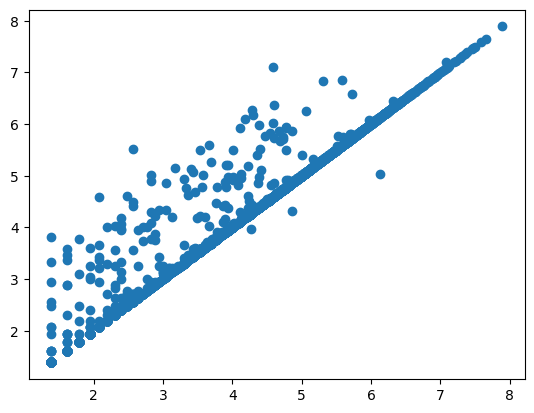

In [111]:
plt.scatter(np.log(cleaner['total_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum']), np.log(cleaner['inpatient_beds_used_covid_7_day_sum']))

In [122]:
factors = [
  'total_patients_hospitalized_confirmed_covid_7_day_sum',
  'total_hospital_inpatient_beds_7_day_sum',
  'total_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
  'inpatient_beds_used_7_day_sum',
  'all_adult_hospital_inpatient_bed_occupied_7_day_sum',
  'inpatient_beds_7_day_sum',
  'total_patients_hospitalized_confirmed_influenza_7_day_sum',
]

In [123]:
[cleaner[factor].dtype for factor in factors]

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')]

In [117]:
'total_beds_7_day' in cleaner.columns

False

/Users/eric/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log


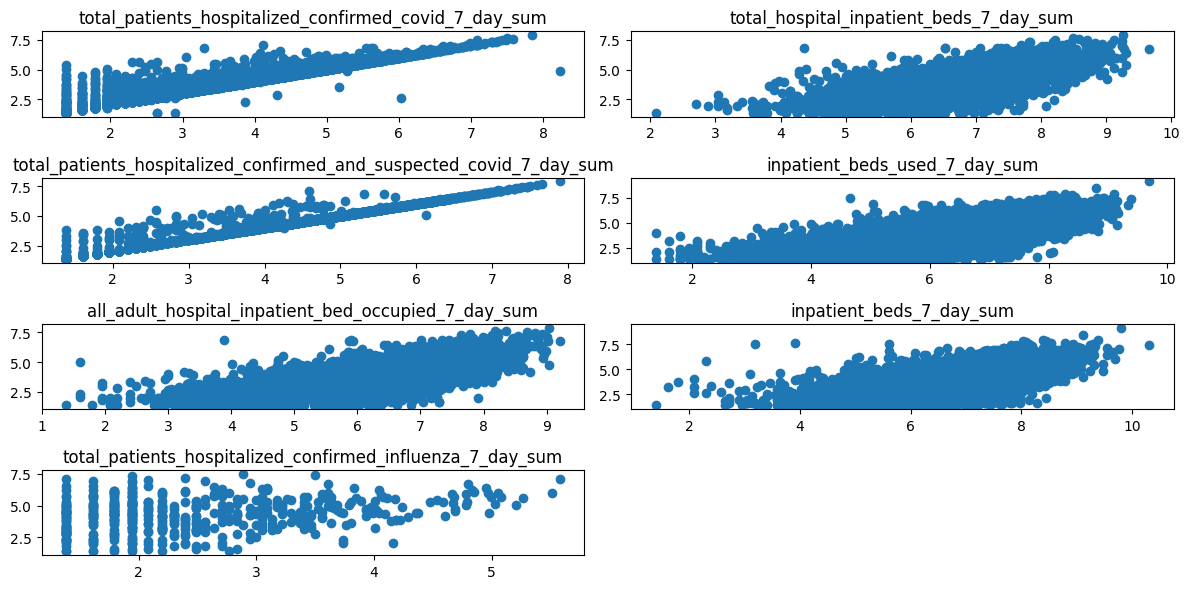

In [135]:
plt.figure(figsize=(12,6))
for i in range(len(factors)):
  ax = plt.subplot(4,2,i+1)
  plt.scatter(np.log(cleaner[factors[i]]), np.log(cleaner['inpatient_beds_used_covid_7_day_sum']))
  ax.set_title(factors[i])
  plt.tight_layout()

  
#plt.xlim([-100,500])
#plt.ylim([-100,1000])

In [138]:
cleaner['total_hospital_inpatient_beds_7_day_sum'].unique

<bound method Series.unique of 0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
14995    1540.0
14996    1106.0
14997    2086.0
14998     418.0
14999     882.0
Name: total_hospital_inpatient_beds_7_day_sum, Length: 15000, dtype: float64>